### Exploring Credit Risks

This activity is another open exploration of a dataset using both cleaning methods and visualizations.  The data describes customers as good or bad credit risks based on a small set of features specified below.  Your task is to create a Jupyter notebook with an exploration of the data using both your `pandas` cleaning and analysis skills and your visualization skills using `matplotlib`, `seaborn`, and `plotly`.  Your final notebook should be formatted with appropriate headers and markdown cells with written explanations for the code that follows. 

Post your notebook file in Canvas, as well as a brief (3-4 sentence) description of what you found through your analysis. Respond to your peers with reflections on thier analysis. 

-----


##### Data Description

```
1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)
```

## Step 1: Import Required Libraries

In this first step, we import the necessary Python libraries for data analysis and visualization:
- `pandas` (pd): For data manipulation and analysis
- `matplotlib.pyplot` (plt): For creating plots and charts
- `plotly.express` (px): For interactive visualizations
- `seaborn` (sns): For statistical visualizations
- `scipy.stats` (stats): For statistical tests and calculations
- `numpy` (np): For numerical operations


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import numpy as np

## Step 2: Data Loading

Here we load the credit risk dataset from a CSV file. This dataset contains information about customers and their credit risk classification.


In [2]:
df = pd.read_csv('data/dataset_31_credit-g.csv')

### Initial Data Exploration

Let's examine the first few rows of the dataset to understand its structure and the type of information it contains.


In [3]:
df.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good


### Dataset Information

Now we'll check the detailed information about the dataset, including data types, non-null counts, and dataset dimensions. We'll also verify if there are any duplicate rows in the dataset.


In [4]:
print(df.info()) 
print('\n\n')
print('There are ' + str(df.shape[0]) + ' rows in the dataset\n'
     +'There are ' + str(df.shape[1]) + ' features in the dataset\n'
     +'There are ' + str(df.duplicated().sum()) + ' duplicate rows in the dataset\n' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

There are no null values in the dataset.
The dataset has 21 features with 1000 rows each.
There are no duplicate rows in the dataset.

### Exploring Categorical Features

Let's examine the unique values of each categorical feature in the dataset. This will help us understand the possible categories and values that each feature can take.


In [5]:
print('checking_status:' + str(df['checking_status'].unique()) + '\n\n')
print('purpose:' + str(df['purpose'].unique()) + '\n\n')

print('credit_history:' + str(df['credit_history'].unique()) + '\n\n')
print('savings_status:' + str(df['savings_status'].unique()) + '\n\n')
print('employment:' + str(df['employment'].unique()) + '\n\n')
print('personal_status:' + str(df['personal_status'].unique()) + '\n\n')
print('other_parties:' + str(df['other_parties'].unique()) + '\n\n')
print('property_magnitude:' + str(df['property_magnitude'].unique()) + '\n\n')

print('other_payment_plans:' + str(df['other_payment_plans'].unique()) + '\n\n')
print('housing:' + str(df['housing'].unique()) + '\n\n')
print('job:' + str(df['job'].unique()) + '\n\n')

print('own_telephone:' + str(df['own_telephone'].unique()) + '\n\n')
print('foreign_worker:' + str(df['foreign_worker'].unique()) + '\n\n')
print('class:' + str(df['class'].unique()) + '\n\n')

checking_status:["'<0'" "'0<=X<200'" "'no checking'" "'>=200'"]


purpose:['radio/tv' 'education' 'furniture/equipment' "'new car'" "'used car'"
 'business' "'domestic appliance'" 'repairs' 'other' 'retraining']


credit_history:["'critical/other existing credit'" "'existing paid'"
 "'delayed previously'" "'no credits/all paid'" "'all paid'"]


savings_status:["'no known savings'" "'<100'" "'500<=X<1000'" "'>=1000'" "'100<=X<500'"]


employment:["'>=7'" "'1<=X<4'" "'4<=X<7'" 'unemployed' "'<1'"]


personal_status:["'male single'" "'female div/dep/mar'" "'male div/sep'" "'male mar/wid'"]


other_parties:['none' 'guarantor' "'co applicant'"]


property_magnitude:["'real estate'" "'life insurance'" "'no known property'" 'car']


other_payment_plans:['none' 'bank' 'stores']


housing:['own' "'for free'" 'rent']


job:['skilled' "'unskilled resident'" "'high qualif/self emp/mgmt'"
 "'unemp/unskilled non res'"]


own_telephone:['yes' 'none']


foreign_worker:['yes' 'no']


class:['good' 'bad

Seems to be an inconcistency in the logic of personal_status feature. We could summarise all the male subcategories or create a new only-gender column in order not to 'erase' the logic of column personal_status.

### Creating a Gender Feature

Based on the observation of inconsistency in the personal_status feature, we'll create a new gender feature. This will allow us to analyze gender-based patterns while preserving the original personal_status information.


In [6]:
#creation of gender feature:
df['gender'] = df['personal_status']
df['gender'] = df['gender'].replace(to_replace = ["'male single'", "'male div/sep'","'male mar/wid'"], value = 'male')
df['gender'] = df['gender'].replace("'female div/dep/mar'",'female')
df[['gender']]

,gender
0,male
1,female
2,male
3,male
4,male
...,...
995,female
996,male
997,male
998,male


### Correlation Analysis of Numerical Features

Let's analyze the correlation between numerical features in the dataset. This will help us identify relationships between variables and potential multicollinearity issues.

Seems that **credit_amount** is correlated with **duration**. There isn't other significant correlation between numerical features.


<Axes: >

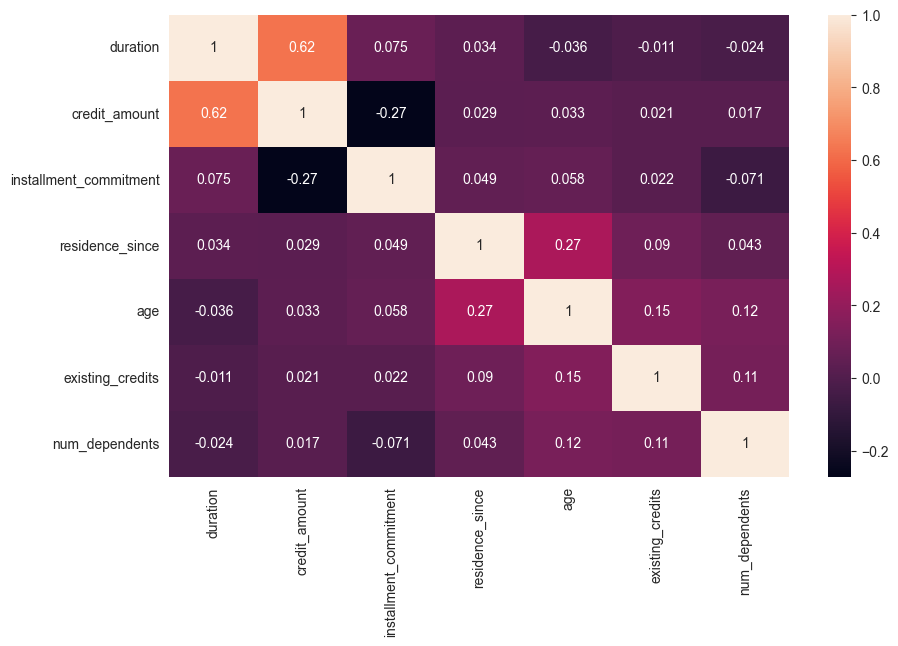

In [7]:
for_htmap = df[['duration' , 
             'credit_amount', 
             'installment_commitment', 
             'residence_since', 
             'age', 
             'existing_credits', 
             'num_dependents']].corr()

plt.figure(figsize = (10,6))
sns.heatmap(for_htmap, annot = True)

### Class Distribution Visualization
Let's visualize the distribution of the target variable 'class' to understand the balance between 'good' and 'bad' credit risks. This is important for understanding potential class imbalance issues if we were to develop a machine learning model.


<Axes: xlabel='class'>

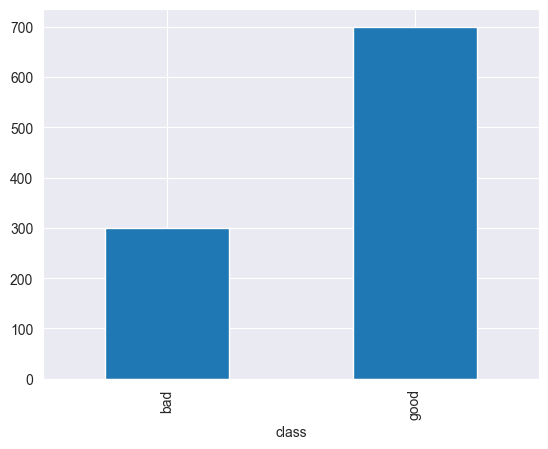

In [8]:
df[['class']].groupby('class').size().plot(kind = 'bar')

**Question**: What is the count of 'bad' and 'good' in the field of 'Class' (which seems to be the target variable if an ML model is developed)?

**Answer**: It seems that the count of 'bad' observations is less than the 'good observations. There should be a consideration on how the field 'Class' should be handled (undersampling, oversampling, etc.)

### Age Distribution Analysis

Let's analyze the distribution of customer ages in the dataset. We'll create a histogram and calculate summary statistics to understand the central tendency and spread of the age variable.


The median age is: 33.0
The mean age is: 35.546


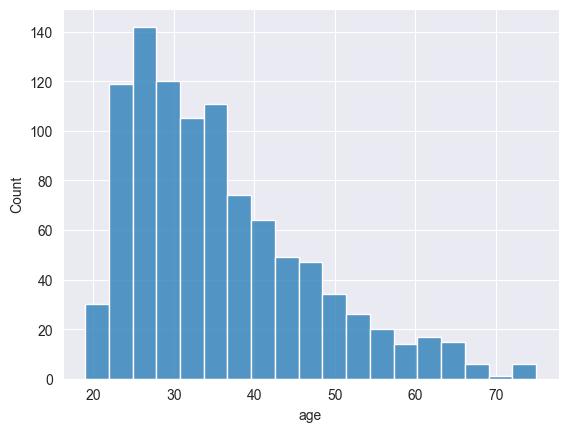

In [9]:
sns.histplot(df['age'])

print('The median age is: ' + str(df['age'].median()) )
print('The mean age is: ' + str(df['age'].mean()) )

**Question**: What is the age range of customers? From the histplot above, the age feature is skewed.

**Answer**: The median age is 33 years old.

### Age Distribution by Credit Risk Class

Let's examine how age distribution varies between good and bad credit risk classes. This will help us understand if age is a factor that might influence credit risk.


<Axes: xlabel='age', ylabel='Count'>

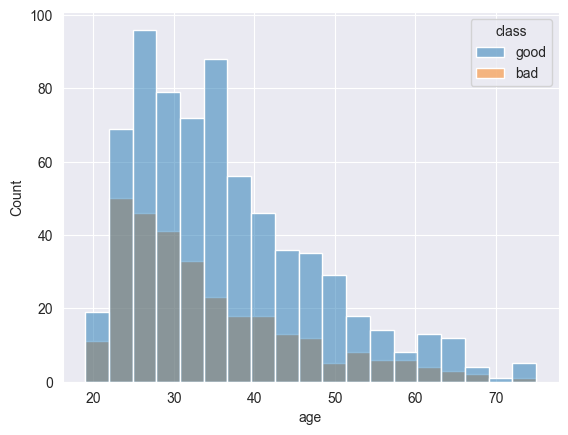

In [10]:
sns.histplot(df, x = 'age', hue = 'class')

### Age Distribution by Gender

Now let's examine how age distribution varies between genders. This will help us understand if there are any age-related patterns that differ between male and female customers.


<Axes: xlabel='age', ylabel='Count'>

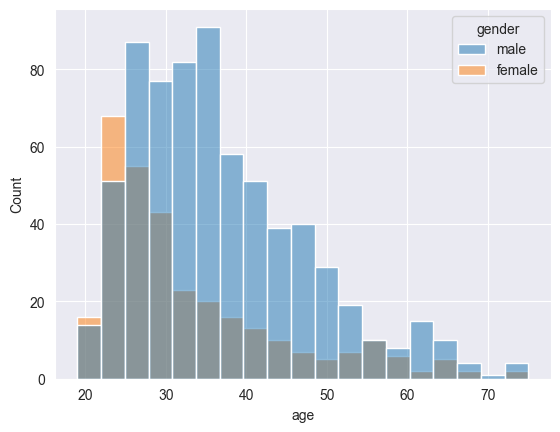

In [11]:
sns.histplot(df, x = 'age', hue = 'gender')

### Gender Distribution Analysis

Let's analyze the distribution of customers by gender. This will help us understand the gender composition of our dataset.


In [12]:
df[['gender', 'class']].groupby('gender').size()

gender
female    310
male      690
dtype: int64

### Relationship Between Credit Amount and Duration

Let's visualize the relationship between credit amount and duration, colored by credit risk class. This will help us understand if there's a pattern in how credit amount and duration relate to credit risk.


In [13]:
# Create an interactive scatter plot
px.scatter(df, x = 'credit_amount', y = 'duration', color = 'class',
          title =  'Scatterplot of Credit Amount - Duration')

### Categorical Data Analysis

Let's analyze the relationships between the target variable 'class' and various categorical features. We'll create contingency tables (crosstabs) to examine how different categories of features are distributed across good and bad credit risks.


In [14]:
# Create a subset of the dataframe with only categorical features of interest
df_categorical = df[['class', 'credit_history', 'purpose', 'other_payment_plans', 'housing', 'job', 'foreign_worker']]

# Create contingency tables for each categorical feature vs. class
compare_credit_history = pd.crosstab(df_categorical['class'],
                                     df_categorical['credit_history'])

compare_purpose = pd.crosstab(df_categorical['class'],
                                     df_categorical['purpose'])

compare_other_payment_plans = pd.crosstab(df_categorical['class'],
                                     df_categorical['other_payment_plans'])

compare_housing = pd.crosstab(df_categorical['class'],
                                     df_categorical['housing'])

compare_job = pd.crosstab(df_categorical['class'],
                                     df_categorical['job'])

compare_foreign_worker = pd.crosstab(df_categorical['class'],
                                     df_categorical['foreign_worker'])

### Chi-Square Test for Independence: Class vs. Credit History

We'll perform a chi-square test to determine if there's a statistically significant relationship between credit risk class and credit history.

- The null hypothesis is that these variables are independent.
- If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant relationship (I should choose the variables with p-value < 0.05).


In [15]:
# are these variables independent?
# Class - Credit History

chi2, p, dof, ex = stats.chi2_contingency(compare_credit_history)

print(f'Chi_square value = {chi2}\n\np value = {p}\n\ndegrees of freedom = {dof}\n\n Expected {ex}')


# looks like our p value is very low
# these categorical variables are not independent

Chi_square value = 61.69139696459551

p value = 1.2791872956750918e-12

degrees of freedom = 4

 Expected [[ 14.7  87.9  26.4 159.   12. ]
 [ 34.3 205.1  61.6 371.   28. ]]


### Chi-Square Test for Independence: Class vs. Purpose

Next, we'll perform a chi-square test to determine if there's a statistically significant relationship between credit risk class and the purpose of the credit. This will help us understand if certain credit purposes are associated with higher or lower credit risk.


In [16]:
# are these variables independent?
# Class - Purpose

chi2, p, dof, ex = stats.chi2_contingency(compare_purpose)

print(f'Chi_square value = {chi2}\n\np value = {p}\n\ndegrees of freedom = {dof}\n\n Expected {ex}')


# looks like our p value is very low
# these categorical variables are not independent

Chi_square value = 33.35644686141814

p value = 0.00011574910079691635

degrees of freedom = 9

 Expected [[  3.6  70.2  30.9  29.1  15.   54.3   3.6  84.    6.6   2.7]
 [  8.4 163.8  72.1  67.9  35.  126.7   8.4 196.   15.4   6.3]]


### Chi-Square Test for Independence: Class vs. Other Payment Plans

Now we'll examine if there's a statistically significant relationship between credit risk class and other payment plans. This will help us understand if having other payment plans affects credit risk.


In [17]:
# are these variables independent?
# Class - Other_payment_plans

chi2, p, dof, ex = stats.chi2_contingency(compare_other_payment_plans)

print(f'Chi_square value = {chi2}\n\np value = {p}\n\ndegrees of freedom = {dof}\n\n Expected {ex}')


# looks like our p value is low
# these categorical variables are not very independent

Chi_square value = 12.839187735866137

p value = 0.0016293178186473534

degrees of freedom = 2

 Expected [[ 41.7 244.2  14.1]
 [ 97.3 569.8  32.9]]


### Chi-Square Test for Independence: Class vs. Housing

Let's analyze if there's a statistically significant relationship between credit risk class and housing status. This will help us understand if housing status (rent, own, etc.) is associated with credit risk.


In [18]:
# are these variables independent?
# Class - Housing

chi2, p, dof, ex = stats.chi2_contingency(compare_housing)

print(f'Chi_square value = {chi2}\n\np value = {p}\n\ndegrees of freedom = {dof}\n\n Expected {ex}')


# looks like our p value is very low
# these categorical variables are not independent

Chi_square value = 18.19984158256362

p value = 0.00011167465374597684

degrees of freedom = 2

 Expected [[ 32.4 213.9  53.7]
 [ 75.6 499.1 125.3]]


### Chi-Square Test for Independence: Class vs. Job

Now we'll examine if there's a statistically significant relationship between credit risk class and job type. This will help us understand if occupation is associated with credit risk.


In [19]:
# are these variables independent?
# Class - Job

chi2, p, dof, ex = stats.chi2_contingency(compare_job)

print(f'Chi_square value = {chi2}\n\np value = {p}\n\ndegrees of freedom = {dof}\n\n Expected {ex}')


# looks like our p value is NOT low
# these categorical variables are independent

Chi_square value = 1.8851560280131707

p value = 0.5965815918843431

degrees of freedom = 3

 Expected [[ 44.4   6.6  60.  189. ]
 [103.6  15.4 140.  441. ]]


### Chi-Square Test for Independence: Class vs. Foreign Worker Status

Finally, we'll examine if there's a statistically significant relationship between credit risk class and foreign worker status.

Additionally, we'll calculate **Cramer's V coefficient** to measure the strength of association between these variables.
- Cramer's V ranges from 0 (no association/complete independence) to 1 (perfect association/complete dependence).


In [20]:
# are these variables independent?
# Class - Foreign worker

chi2, p, dof, ex = stats.chi2_contingency(compare_foreign_worker)

print(f'Chi_square value = {chi2}\n\np value = {p}\n\ndegrees of freedom = {dof}\n\n Expected {ex}\n\n')


# calculate the minimum of the number of categories in the two variables
min_categories = min(compare_foreign_worker.shape[0], compare_foreign_worker.shape[1])

# calculate Cramer's V coefficient
n = compare_foreign_worker.sum().sum()
V = np.sqrt(chi2 / (n * (min_categories - 1)))

print("Cramer's V coefficient is: " + str(V))

Chi_square value = 5.821575915033861

p value = 0.015830754902852885

degrees of freedom = 1

 Expected [[ 11.1 288.9]
 [ 25.9 674.1]]


Cramer's V coefficient is: 0.07629925238843341


## Conclusion

In this exploratory data analysis of credit risk data, we've examined various aspects of the dataset to understand factors that might influence credit risk classification. Here's a summary of our key findings:

1. **Data Quality**: The dataset contains 1000 observations with 21 features and no missing values or duplicates.

2. **Gender Analysis**: We created a gender feature from the personal_status variable to better analyze gender-based patterns while preserving the original information.

3. **Correlation Analysis**: We found that credit amount is correlated with duration, but there are no other significant correlations between numerical features.

4. **Class Distribution**: There is an imbalance in the target variable, with fewer 'bad' credit risks than 'good' ones. This would need to be addressed if developing a machine learning model.

5. **Age Distribution**: The age distribution is skewed, with a median age of 33 years. We also examined age distributions by credit risk class and gender.

6. **Credit Amount and Duration**: We visualized the relationship between credit amount and duration, colored by credit risk class.

7. **Statistical Tests**: We performed chi-square tests to identify categorical variables that have a significant relationship with credit risk:
   - Credit history, purpose, other payment plans, and housing all showed significant relationships with credit risk (p < 0.05)
   - Job type did not show a significant relationship with credit risk (p > 0.05)
   - For foreign worker status, we calculated Cramer's V coefficient to measure the strength of association

These insights provide a foundation for understanding the factors that may influence credit risk and could be used to develop more sophisticated predictive models.
